<a href="https://colab.research.google.com/github/welterb/beer-reviews/blob/main/Beer_Reviews_Statistical_Analysis_with_Python_1_8_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
*   The selected data for exploration is Beer Reviews from Kaggle. This chosen data set will be explored to further understand what customers find most important in their beer. The beers are evaluted based on aroma, appearance, palate, and taste. Other recorded information in this dataset is the overall score and the alcohol-by-volume.
*   Using multiple regression testing we can evalute all variables and establish how important they are to the end goal.


*   Hypothesis:
*   Ho: There is no significant difference between the overall review score and the underlying variables. (aroma, appearance, palate, and taste)
*   Ha: There is a significant difference between the overall review score and the underlying variables.

*   There is also investigation of the relationship between alcohol content of beer and the score they recieve.


Following this investigation, I would expect this to be both valuable to manufacturers of beer and the consumer understanding what drives consumption.









# **Import Data**

In [ ]:
# import & alias modules necessary for exploring this data set
import math
import pandas as pd
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#read in data and get info 
beer_df = pd.read_csv("/content/gdrive/My Drive/Thinkful Course Uploads/Capstone 3/beer_reviews.csv")
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


# **Explore Data**: The following gives a breakdown of the data and gathering the final dataframes for evaluating the relationship of the variables to overall score. As well as a filtered dataframe that can confirm some consistency in the final representation of the relationship using multiple regression.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


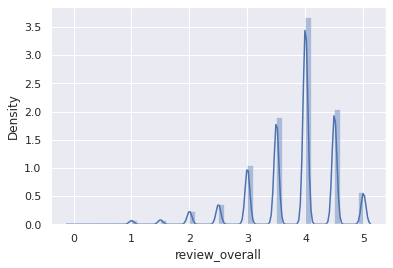

In [ ]:
#view and understand distribution of the overall review scores. Check for normal distribution.
ax = sns.distplot(beer_df['review_overall'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


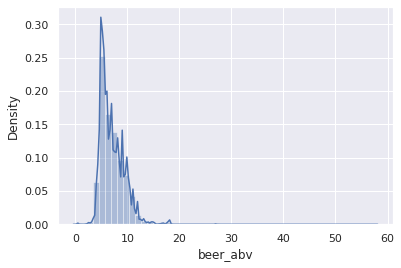

In [ ]:
#Create distribution plot of ABV to understand the values and where they typically sit.
ax = sns.distplot(beer_df['beer_abv'])

In [ ]:
#descriptive stats on columns to understand what typical values look like. Values of reviews look fairly similar, it brings into question
#if they are signicantly different from one another
beer_df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [ ]:
#find number of records for each beers, noting a significant quantity of styles of beers.
beer_df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

In [ ]:
#Drop Null Values for use in Multiple Regression and Box Plot visualization
beer_df_regression = beer_df.dropna()
beer_df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB


[Text(0, 0, 'review_overall'),
 Text(0, 0, 'review_aroma'),
 Text(0, 0, 'review_appearance'),
 Text(0, 0, 'review_palate'),
 Text(0, 0, 'review_taste')]

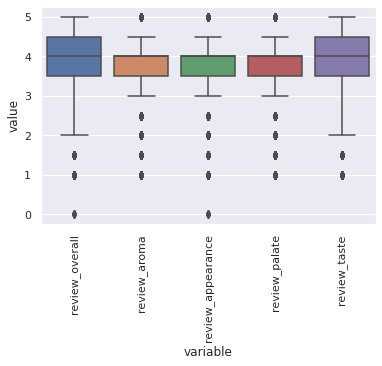

In [ ]:
#Make adjusted DF for box plot by using melt function
box_df = beer_df_regression.drop(columns=["brewery_id","brewery_name","review_time","review_profilename","beer_style","beer_name","beer_beerid","beer_abv"])

#Box and Whisker Plot for visual comparison of review scores
ax = sns.boxplot(x="variable", y="value", data=pd.melt(box_df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


The box plot of the relationship shows that the overall review typically has a bit of a higher score than the aroma, appearance, and palate of the beer. However, it is relatively in line with the taste which could indicate that taste has a higher impact on review score.

In [ ]:
#Add counts of Style for filterting beer_df
beer_df_filtered = beer_df_regression
df2 = pd.DataFrame(beer_df_filtered['beer_style'].value_counts())
df2.reset_index(inplace=True)
df2.columns = ['beer_style','style_counts']
beer_df_filtered = beer_df_filtered.merge(df2, on='beer_style')
beer_df_filtered.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1518477
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
 13  style_counts        1518478 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 173.8+ MB


In [ ]:
#Identify top 10 highest quantitiy of reviews on beer styles
s = beer_df_filtered['beer_style'].value_counts()
s.nlargest(10)

American IPA                        113144
American Double / Imperial IPA       85105
American Pale Ale (APA)              58072
Russian Imperial Stout               53424
American Double / Imperial Stout     50137
American Porter                      46647
American Amber / Red Ale             41731
Belgian Strong Dark Ale              37498
Fruit / Vegetable Beer               31983
American Strong Ale                  31350
Name: beer_style, dtype: int64

In [ ]:
#Remove beers with style counts less than 31350 beers to achieve top 10 styles
beer_df_top = beer_df_filtered[beer_df_filtered.style_counts>=31350]
beer_df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549091 entries, 57417 to 832147
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          549091 non-null  int64  
 1   brewery_name        549091 non-null  object 
 2   review_time         549091 non-null  int64  
 3   review_overall      549091 non-null  float64
 4   review_aroma        549091 non-null  float64
 5   review_appearance   549091 non-null  float64
 6   review_profilename  549091 non-null  object 
 7   beer_style          549091 non-null  object 
 8   review_palate       549091 non-null  float64
 9   review_taste        549091 non-null  float64
 10  beer_name           549091 non-null  object 
 11  beer_abv            549091 non-null  float64
 12  beer_beerid         549091 non-null  int64  
 13  style_counts        549091 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 62.8+ MB


In [ ]:
#Show counts to verify integrity of data
s = beer_df_top['beer_style'].value_counts()
s.nlargest(10)

American IPA                        113144
American Double / Imperial IPA       85105
American Pale Ale (APA)              58072
Russian Imperial Stout               53424
American Double / Imperial Stout     50137
American Porter                      46647
American Amber / Red Ale             41731
Belgian Strong Dark Ale              37498
Fruit / Vegetable Beer               31983
American Strong Ale                  31350
Name: beer_style, dtype: int64

Identify and remove breweries that are not top for reviews on these styles of beers.

In [ ]:
#Preparing dataframe to compare top 10 beers in the top 15 breweries.
df2 = pd.DataFrame(beer_df_filtered['brewery_name'].value_counts())
df2.reset_index(inplace=True)
df2.columns = ['brewery_name','brewery_counts']
beer_df_top = beer_df_top.merge(df2, on='brewery_name')
beer_df_top.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 549091 entries, 0 to 549090
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          549091 non-null  int64  
 1   brewery_name        549091 non-null  object 
 2   review_time         549091 non-null  int64  
 3   review_overall      549091 non-null  float64
 4   review_aroma        549091 non-null  float64
 5   review_appearance   549091 non-null  float64
 6   review_profilename  549091 non-null  object 
 7   beer_style          549091 non-null  object 
 8   review_palate       549091 non-null  float64
 9   review_taste        549091 non-null  float64
 10  beer_name           549091 non-null  object 
 11  beer_abv            549091 non-null  float64
 12  beer_beerid         549091 non-null  int64  
 13  style_counts        549091 non-null  int64  
 14  brewery_counts      549091 non-null  int64  
dtypes: float64(6), int64(5), object(4)

In [ ]:
#Identify top 15 highest quantitiy of reviews
s = beer_df_top['brewery_name'].value_counts()
s.nlargest(15)

Stone Brewing Co.                     23867
Dogfish Head Brewery                  18698
Sierra Nevada Brewing Co.             16102
Bell's Brewery, Inc.                  13425
Founders Brewing Company              13156
Lagunitas Brewing Company             12683
Southern Tier Brewing Company         10155
Rogue Ales                            10112
Great Divide Brewing Company           9688
Boston Beer Company (Samuel Adams)     8540
Three Floyds Brewing Co. & Brewpub     7812
Avery Brewing Company                  7446
Victory Brewing Company                7439
Deschutes Brewery                      6861
Unibroue                               6521
Name: brewery_name, dtype: int64

In [ ]:
#Filter out bottom breweries by removing breweries with less than 6521 reviews, data is now prepared for further exploration and evaluation.
beer_df_top = beer_df_top[beer_df_top.brewery_counts>=6521]
beer_df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278966 entries, 4124 to 544797
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          278966 non-null  int64  
 1   brewery_name        278966 non-null  object 
 2   review_time         278966 non-null  int64  
 3   review_overall      278966 non-null  float64
 4   review_aroma        278966 non-null  float64
 5   review_appearance   278966 non-null  float64
 6   review_profilename  278966 non-null  object 
 7   beer_style          278966 non-null  object 
 8   review_palate       278966 non-null  float64
 9   review_taste        278966 non-null  float64
 10  beer_name           278966 non-null  object 
 11  beer_abv            278966 non-null  float64
 12  beer_beerid         278966 non-null  int64  
 13  style_counts        278966 non-null  int64  
 14  brewery_counts      278966 non-null  int64  
dtypes: float64(6), int64(5), object

[Text(0, 0, 'review_overall'),
 Text(0, 0, 'review_aroma'),
 Text(0, 0, 'review_appearance'),
 Text(0, 0, 'review_palate'),
 Text(0, 0, 'review_taste')]

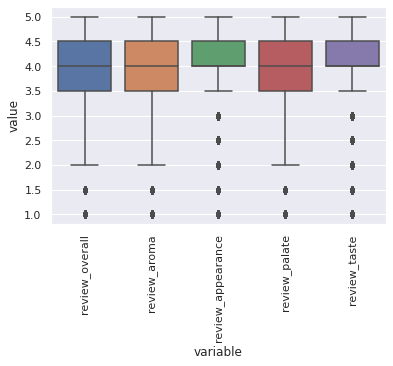

In [ ]:
#Make adjusted DF for box plot by using melt function
box2_df = beer_df_top.drop(columns=["brewery_id","brewery_name","review_time","review_profilename","beer_style","beer_name","beer_beerid","beer_abv","brewery_counts","style_counts"])

#Box and Whisker Plot for visual comparison of review scores
ax = sns.boxplot(x="variable", y="value", data=pd.melt(box2_df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


*   This box plot shows a minorly different story than the one on all beers, where the review scores for aroma and palate are a bit more consistent with overall score but the tighter spread of data on taste shows that scores are typically higher on taste than they were in the original data set.
*   To further evalute a multiple regression fit test is conducted on both data frames to give a model to tell us what is happening.

# **Multiple Linear Regression**: Overall Beer Reviews
*   Now that exploration is complete using multiple regression we are able to evaluate the relationship between variables and create a regression fit. The coefficients will also tell us what is most important to the reviewer when they are reviewing beers.




In [ ]:
#Establish variables, Overall Review becomes the Y, other values are X in Multiple Regression
X = beer_df_regression[['review_aroma','review_appearance','review_palate','review_taste','beer_abv']]
Y = beer_df_regression['review_overall']

#Show stats model of Multiple Regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.5194712380280908
Coefficients: 
 [ 0.07685535  0.04795769  0.27068945  0.55412886 -0.0414845 ]


Linear Regression Line
*   Y = 0.519 + 0.077(review_aroma) + 0.048(review_appearance) + 0.27(review_palate) + 0.55(review_taste) -0.042(beer_abv)

*   This is the regression line that will tell us that the taste is the most important to the reviewer as its coefficient is multiplied by the highest value of 0.55.
*   ABV has a negative effect on score. With most beers sitting below 10% abv it has a lesser effect on overall score than a beer that recieves a review on the taste of 1.





In [ ]:
#Statistical analysis using statsmodels to find the p-values of these relationships.
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 6.161e+05
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:46:54   Log-Likelihood:            -8.0866e+05
No. Observations:             1518478   AIC:                         1.617e+06
Df Residuals:                 1518472   BIC:                         1.617e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5195      0.00

**Conclusion of Multiple Regression on All Beers**
*   The data shows that there are extremely small p-values and since they are smaller than 0.05 we can reject the null hypothesis that there is no significant difference between them. 
*   Each varaiable has a significant impact on the overall score but some have a smaller impact than others. Data shows that there is more emphasis on the beer having a good palate and taste than the aroma or appearance. 

*   To further investigate lets look at the dataframe that has been filtered down into the Top Beers and the Top Breweries that brew these beers.





# **Multiple Linear Regression**: Top Beers/Breweries

In [ ]:
#Establish variables, Overall Review becomes the y, other values are X in Multiple Regression, using the same variables as the multiple regression fit of all beers.
X = beer_df_top[['review_aroma','review_appearance','review_palate','review_taste','beer_abv']]
Y = beer_df_top['review_overall']

#Show stats model of Multiple Regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.43247187056847247
Coefficients: 
 [ 0.09443225  0.06626044  0.26495691  0.54125503 -0.04089531]


Linear Regression Line for Top Beers/Breweries
*   Y = 0.432 + 0.094(review_aroma) + 0.066(review_appearance) + 0.26(review_palate) + 0.54(review_taste) -0.041(beer_abv)

All Beers
*   Y = 0.519 + 0.077(review_aroma) + 0.048(review_appearance) + 0.27(review_palate) + 0.55(review_taste) -0.042(beer_abv)
*   There are very small differences between the two fits. Some more emphasis is set on the aroma and appearance but the most important part for the reviewer is the taste and palate.





In [ ]:
#Statistical analysis using statsmodels to find the p-values of the relationship between the variables
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 8.855e+04
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:27:56   Log-Likelihood:            -1.4481e+05
No. Observations:              278966   AIC:                         2.896e+05
Df Residuals:                  278960   BIC:                         2.897e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4325      0.00

**Findings from Multiple Regression of Filtered DataFrame**
*   As seen above the regression fit line is very similar to the original value which shows some consistency as ~1.2 million lines of data were filtered off by selecting the most popular items.
*   These variables are still significantly impactful on the overall score and the ABV maintained a negative relationship to the overall score.



# **Conclusion**


*   From evaluating and exploring the data using Multiple Regression we are able to reject all null hypothesis presented as we saw very low p-values in testing. This tells us that they have an impact on the overall score. 
*   The overall score is most impacted by the taste of the beer, as well as some negative influence from the ABV.

#**Recommendation**
*   My recommendation for consumers and beer crafters is to make sure you have a great balance of taste and never over do the amount of alcohol that is in a beer. When you focus on a beer that tastes good and has the appropriate amount of alcohol you have created or are currently enjoying a real winner!






